### ==============KNN(K  -Nearest Neighbour) ===========================================
#### 'K ' is a supervised learning /classfication  and Regression.'K' represent the no of neighbours used to classify /predict.

### ================================Glass data========================================

In [1]:
import pandas as pd
import numpy as np

In [2]:
glass=pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
glass.shape

(214, 10)

In [4]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
x=glass.drop(['Type'],inplace=False,axis=1)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [8]:
y=glass["Type"]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12,shuffle=True,stratify=y)

In [11]:
from sklearn.model_selection import train_test_split
x_train.shape,y_train.shape

((171, 9), (171,))

In [12]:
x_test.shape,y_test.shape

((43, 9), (43,))

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train,y_train)

y_pred = knn_classifier.predict(x_train)
print('Accuracy Score: ',round(accuracy_score(y_train,y_pred),4))

Accuracy Score:  0.7895


In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(x_train,y_train)

y_pred = knn_classifier.predict(x_train)
print('Accuracy Score: ',round(accuracy_score(y_train,y_pred),4))

Accuracy Score:  0.7836


In [16]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train,y_train)

y_pred = knn_classifier.predict(x_train)
print('Accuracy Score: ',round(accuracy_score(y_train,y_pred),4))

Accuracy Score:  0.7544


In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(x_train,y_train)

y_pred = knn_classifier.predict(x_train)
print('Accuracy Score: ',round(accuracy_score(y_train,y_pred),4))

Accuracy Score:  0.7076


In [18]:
std_scaler = StandardScaler()
std_scaler = std_scaler.fit_transform(x)
x_scaled = pd.DataFrame(data = std_scaler,columns=x.columns)
x_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=12,shuffle=True,stratify=y)

In [20]:
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(x_train,y_train)

y_pred = knn_classifier.predict(x_train)
print('Accuracy Score: ',round(accuracy_score(y_train,y_pred),4))

Accuracy Score:  0.731


In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train,y_train)

y_pred = knn_classifier.predict(x_train)
print('Accuracy Score: ',round(accuracy_score(y_train,y_pred),4))

Accuracy Score:  0.7251


In [22]:
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(x_train,y_train)

y_pred = knn_classifier.predict(x_train)
print('Accuracy Score: ',round(accuracy_score(y_train,y_pred),4))

Accuracy Score:  0.7018


In [23]:
kfold = KFold(n_splits=5,shuffle=True,random_state=14)
cv_scores = []

for i in range(1,31,2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cross_val_scores = cross_val_score(estimator = knn_model,X = x_scaled,y=y,cv=kfold)
    print(i,'th Iteration:\n',cross_val_scores.mean().round(4))
    cv_scores.append(cross_val_scores.mean().round(4))

1 th Iteration:
 0.701
3 th Iteration:
 0.6966
5 th Iteration:
 0.6498
7 th Iteration:
 0.6592
9 th Iteration:
 0.6404
11 th Iteration:
 0.6495
13 th Iteration:
 0.645
15 th Iteration:
 0.6169
17 th Iteration:
 0.6261
19 th Iteration:
 0.6355
21 th Iteration:
 0.6309
23 th Iteration:
 0.6031
25 th Iteration:
 0.5938
27 th Iteration:
 0.589
29 th Iteration:
 0.5796


In [24]:
cv_scores

[0.701,
 0.6966,
 0.6498,
 0.6592,
 0.6404,
 0.6495,
 0.645,
 0.6169,
 0.6261,
 0.6355,
 0.6309,
 0.6031,
 0.5938,
 0.589,
 0.5796]

In [25]:
max(cv_scores)

0.701

In [26]:
cv_scores.index(max(cv_scores))

0

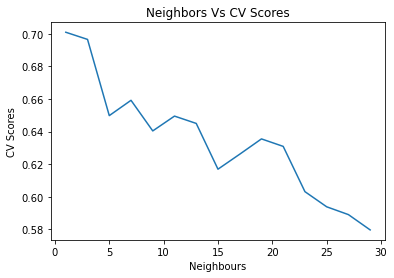

In [27]:
plt.plot(range(1,31,2),cv_scores)
plt.xlabel('Neighbours')
plt.ylabel('CV Scores')
plt.title('Neighbors Vs CV Scores')
plt.show()

#### Another approach

In [28]:
array=glass.values
X=array[:,0:9]

In [29]:
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [30]:
Y=array[:,9]

In [31]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [32]:
from sklearn.model_selection import KFold

In [33]:
KFold=KFold(n_splits=10)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [35]:
model=KNeighborsClassifier(n_neighbors=18)

In [36]:
result=cross_val_score(model,X,Y,cv=KFold)

In [37]:
print(result.mean())

0.4426406926406926


In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
n_neighbors1=np.array(range(1,80))

In [40]:
params_grid=dict(n_neighbors=n_neighbors1)

In [41]:
model=KNeighborsClassifier()

In [42]:
grid=GridSearchCV(estimator=model,param_grid=params_grid)

In [43]:
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])})

In [44]:
print(grid.best_score_)

0.640531561461794


In [45]:
print(grid.best_params_)

{'n_neighbors': 1}


In [46]:
import matplotlib.pyplot as plt

In [47]:
get_ipython().run_line_magic('matplotlib','inline')

In [48]:
k_range=range(1,80)

In [49]:
k_scores=[]

In [50]:
for k in k_range :
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,Y,cv=5)
    k_scores.append(scores.mean())

<function matplotlib.pyplot.show(close=None, block=None)>

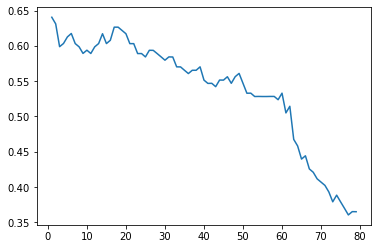

In [51]:
plt.plot(k_range,k_scores)
plt.show

###  =============================ZOO DATA=====================================

In [52]:
import pandas as pd
import numpy as np

In [53]:
zoo=pd.read_csv("zoo.csv")

In [54]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [55]:
zoo.shape

(101, 18)

In [56]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [57]:
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [58]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [59]:
zoo.drop('animal name',axis=1,inplace=True)

In [60]:
x=zoo.drop(['type'],inplace=False,axis=1)
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [61]:
y=zoo['type']
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12,shuffle=True,stratify=y)

In [63]:
x_train.shape,y_train.shape

((80, 16), (80,))

In [64]:
x_test.shape,y_test.shape

((21, 16), (21,))

In [65]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train,y_train)

y_pred = knn_classifier.predict(x_train)
print('Accuracy Score: ',round(accuracy_score(y_train,y_pred),4)) 

Accuracy Score:  0.975


In [66]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train,y_train)

y_pred = knn_classifier.predict(x_train)
print('Accuracy Score: ',round(accuracy_score(y_train,y_pred),4)) 

Accuracy Score:  0.9375


In [67]:
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(x_train,y_train)

y_pred = knn_classifier.predict(x_train)
print('Accuracy Score: ',round(accuracy_score(y_train,y_pred),4)) 

Accuracy Score:  0.8125


In [68]:
std_scaler = StandardScaler()
std_scaler = std_scaler.fit_transform(x)
x_scaled = pd.DataFrame(data = std_scaler,columns=x.columns)
x_scaled

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595


In [73]:
cv_scores

[0.701,
 0.6966,
 0.6498,
 0.6592,
 0.6404,
 0.6495,
 0.645,
 0.6169,
 0.6261,
 0.6355,
 0.6309,
 0.6031,
 0.5938,
 0.589,
 0.5796]

In [74]:
max(cv_scores)

0.701

In [75]:
cv_scores.index(max(cv_scores))

0

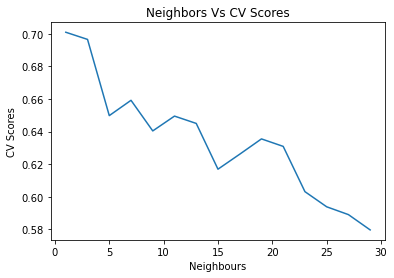

In [76]:
plt.plot(range(1,31,2),cv_scores)
plt.xlabel('Neighbours')
plt.ylabel('CV Scores')
plt.title('Neighbors Vs CV Scores')
plt.show()

### Another approach

In [80]:
array=zoo.values
X=array[:,1:18]

In [81]:
X

array([[0, 0, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 0, 4],
       ...,
       [0, 0, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 0, 7],
       [1, 1, 0, ..., 0, 0, 2]], dtype=int64)

In [82]:
Y=array[:,16]

In [83]:
from sklearn.model_selection import KFold

In [84]:
KFold=KFold(n_splits=10)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [86]:
model=KNeighborsClassifier(n_neighbors=18)

In [87]:
result=cross_val_score(model,X,Y,cv=KFold)

In [88]:
print(result.mean())

0.8099999999999999


In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
n_neighbors=np.array(range(1,80))

In [91]:
paramgrid=dict(n_neighbors=n_neighbors)

In [92]:
model=KNeighborsClassifier()

In [93]:
grid=GridSearchCV(estimator=model,param_grid=paramgrid)

In [94]:
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])})

In [95]:
print(grid.best_score_)

1.0


In [96]:
print(grid.best_params_
     )

{'n_neighbors': 1}


In [97]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [98]:
get_ipython().run_line_magic('matplotlib','inline')

In [99]:
k_range=range(1,80)

In [100]:
k_scores=[]

In [101]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,Y,cv=5)
    k_scores.append(scores.mean())

<function matplotlib.pyplot.show(close=None, block=None)>

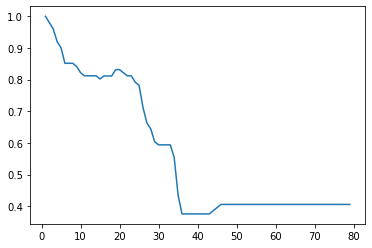

In [102]:
plt.plot(k_range,k_scores)
plt.show